#**Function**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [10]:
#dispersion & standard deviation(분산과 표준편차)
def var_std(data, mean):
  S = s = 0
  for i in data:
    S += math.pow(i-mean, 2)
  S /= (len(data) -1)
  s = math.sqrt(S)
  return (S, s)

In [11]:
#Interquartile-Range
def ir(data,p_list):
  k_list = []; q_list = []
  for p in p_list:
    k = (len(data)-1) * p + 1
    k_list.append(k)
  for k in k_list:
    sk = str(k); dot = sk.find('.'); dot_next = sk[dot+1]
    if dot != -1:
      if dot_next == 0:
        q = data[int(k-1)]
        q_list.append(q)
      else:
        q = (data[int(k-1)]+data[int(k)])/2
        q_list.append(q)
  iqr = q_list[-1]-q_list[0]
  print(q_list)
  return iqr

In [12]:
#skewness & kutosis(왜도와 첨도)
def skew(data,mean):
  r = 0
  for i in data:
    r += math.pow((i-mean),3)
  S, s = var_std(data, mean)
  b1 = r / (math.pow(s,3)*(len(data)-1))
  return b1

def kuto(data, mean):
  r = 0
  for i in data:
    r += math.pow((i-mean),4)
  S, s = var_std(data, mean)
  b2 = r / (math.pow(s,4)*(len(data)-1))
  return b2

In [13]:
#Sample covariance & Sample correlation coefficient(공분산, 표본상관계수)
def c_rxy(data1, data2, mean1, mean2):
  sxy = 0
  for i, j in zip(data1, data2):
    rx = (i - mean1); ry = (j - mean2)
    sxy += (rx*ry)
  S1, s1 = var_std(data1, mean1)
  S2, s2 = var_std(data2, mean2)
  c = sxy / (len(data1)-1)
  rxy = c / (s1*s2)
  return (c, rxy)

#**Application(Question)**



**통계학: 기본개념과 원리(2장)** /
**Statistics: Basic Concepts & Principles(ch2)**

Q2: table that shows lifespan and reigning period of Chosun Dynasty kings



In [14]:
x = [74, 63, 56, 54, 39, 17, 52, 20, 38, 31,\
     57, 31, 32, 57, 67, 55, 41, 34, 60, 37, \
     83, 49, 45, 23, 33, 68, 53]

y = [7, 2, 18, 32, 2, 3, 14, 1.083, 25, 12,\
     39, 0.75, 22, 41, 15, 27, 10, 15, 46, 4,\
     52, 24, 34, 15, 14, 44, 3]

In [15]:
#Q2-2
x_mean = np.mean(x); y_mean = np.mean(y)
x_median = np.median(x); y_median = np.median(y)
x_dis = y_dis = 0
for i in x:
  x_dis += math.pow(i - x_mean,2)
x_dis = x_dis /len(x); x_std = math.sqrt(x_dis)
for i in y:
  y_dis += math.pow(i - y_mean,2)
y_dis = y_dis/len(y); y_std = math.sqrt(y_dis)
print('mean: %f, median: %f, standard deviation: %f'%(x_mean, x_median, x_std))
print('mean: %f, median: %f, standard deviation: %f'%(y_mean, y_median, y_std))

mean: 47.000000, median: 49.000000, standard deviation: 16.490177
mean: 19.327148, median: 15.000000, standard deviation: 15.146435


In [16]:
#Q2-3
iqrx = ir(x,[0.25, 0.5, 0.75])
print('iqr = ', iqrx)

[36.0, 62.0, 60.0]
iqr =  24.0


In [17]:
#Q2-4
xx = x[:]; yy = y[:]
xx.pop(5); yy.pop(5)
xx_mean = np.mean(xx); yy_mean = np.mean(yy)
xx_median = np.median(xx); yy_median = np.median(yy)
xx_dis = yy_dis = 0
for i in xx:
  xx_dis += math.pow(i - xx_mean,2)
xx_dis = xx_dis /len(x); xx_std = math.sqrt(xx_dis)
for i in yy:
  yy_dis += math.pow(i - yy_mean,2)
yy_dis = yy_dis/len(y); yy_std = math.sqrt(yy_dis)
print('mean: %f, median: %f, standard deviation: %f'%(xx_mean, xx_median, xx_std))
print('mean: %f, median: %f, standard deviation: %f'%(yy_mean, yy_median, yy_std))

mean: 48.153846, median: 50.500000, standard deviation: 15.404887
mean: 19.955115, median: 15.000000, standard deviation: 14.804107


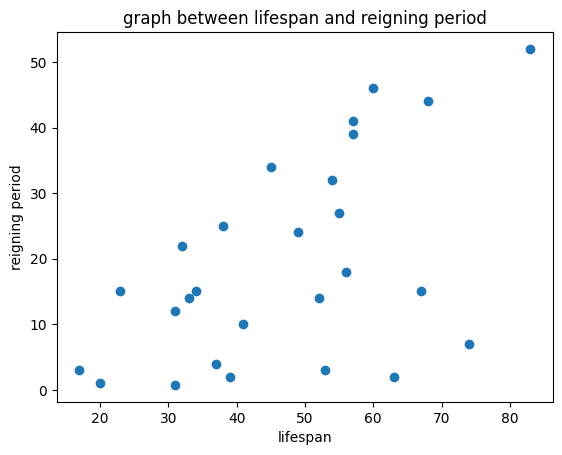

0.5397257244161114


In [36]:
#Q2-5
plt.scatter(x, y)
plt.title('graph between lifespan and reigning period')
plt.xlabel('lifespan');plt.ylabel('reigning period')
plt.show()
cxy, rxy = c_rxy(x, y, x_mean, y_mean)
print(rxy)

Q7: table about first brother and second brother's head length and width

In [19]:
len1 = [191, 195, 181, 183, 176, 208, 189, 197, 188, 192, \
        179, 183, 174, 190, 188, 163, 195, 186, 181, 175, \
        192, 174, 176, 197, 190]
len2 = [179, 201, 185, 188, 171, 192, 190, 189, 197, 187, \
        186, 174, 185, 195, 187, 161, 183, 173, 182, 165, \
        185, 178, 176, 200, 187]
wid1 = [155, 149, 148, 153, 144, 157, 150, 159, 152, 150, \
        158, 147, 150, 159, 151, 137, 155, 153, 145, 140, \
        154, 143, 139, 167, 163]
wid2 = [145, 152, 149, 149, 142, 152, 149, 152, 159, 151, \
        148, 147, 152, 157, 158, 130, 158, 148, 146, 137, \
        152, 147, 143, 158, 150]

In [23]:
#Q7-1
flen_mean = np.mean(len1); slen_mean = np.mean(len2)
flen_var, flen_std = var_std(len1, flen_mean)
slen_var, slen_std = var_std(len2, slen_mean)
print('*length of head*')
print("first bro's mean: %f, first bro's std: %f" %(flen_mean, flen_std))
print("second bro's mean: %f, second bro's std: %f" %(slen_mean, slen_std))

fwid_mean = np.mean(wid1); swid_mean = np.mean(wid2)
fwid_var, fwid_std = var_std(wid1, fwid_mean)
swid_var, swid_std = var_std(wid2, swid_mean)
print()
print('*width of head*')
print("first bro's mean: %f, first bro's std: %f" %(fwid_mean, fwid_std))
print("second bro's mean: %f, second bro's std: %f" %(swid_mean, swid_std))

*length of head*
first bro's mean: 185.720000, first bro's std: 9.761830
second bro's mean: 183.840000, second bro's std: 10.040252

*width of head*
first bro's mean: 151.120000, first bro's std: 7.372923
second bro's mean: 149.240000, second bro's std: 6.709943


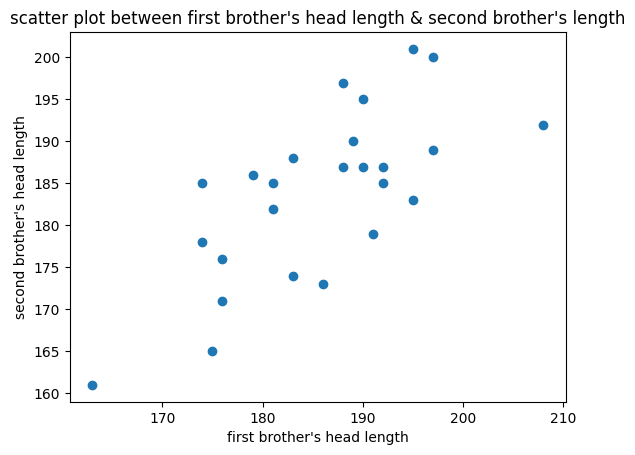

0.7107518099180434


In [37]:
#Q7-2
plt.title("scatter plot between first brother's head length & second brother's length")
plt.scatter(len1,len2)
plt.xlabel("first brother's head length"); plt.ylabel("second brother's head length")
plt.show()
c, r = c_rxy(len1, len2, flen_mean, slen_mean)
print(r)

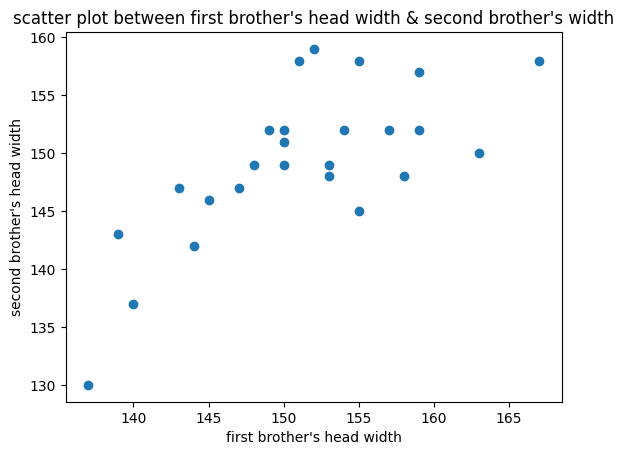

0.7085504466070531


In [39]:
plt.title("scatter plot between first brother's head width & second brother's width")
plt.scatter(wid1, wid2)
plt.xlabel("first brother's head width"); plt.ylabel("second brother's head width")
plt.show()
c, r = c_rxy(wid1, wid2, fwid_mean, swid_mean)
print(r)

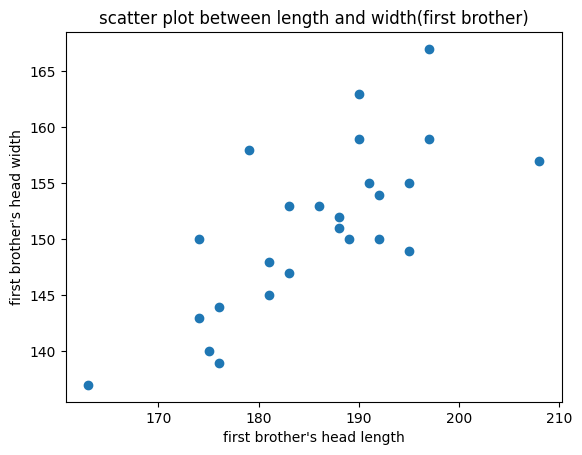

0.7345555360078418


In [40]:
#Q7-3
plt.title("scatter plot between length and width(first brother)")
plt.scatter(len1, wid1)
plt.xlabel("first brother's head length"); plt.ylabel("first brother's head width")
plt.show()
c, r = c_rxy(len1, wid1, flen_mean, fwid_mean)
print(r)

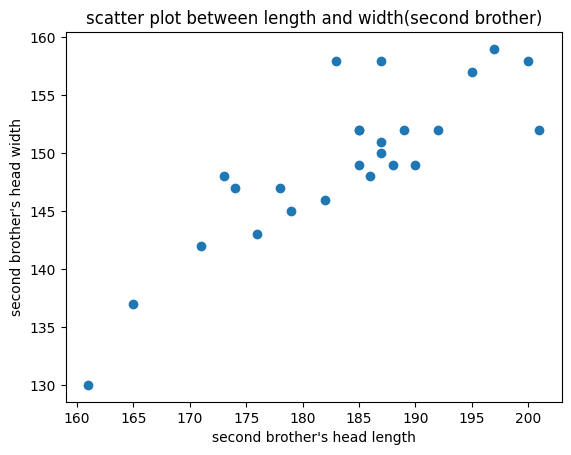

0.8392519411261863


In [41]:
plt.title("scatter plot between length and width(second brother)")
plt.scatter(len2, wid2)
plt.xlabel("second brother's head length"); plt.ylabel("second brother's head width")
plt.show()
c, r = c_rxy(len2, wid2, slen_mean, swid_mean)
print(r)

Q11

In [29]:
region = ['충북', '강원', '인천', '대전', '경기', '부산','충남','대구','서울', \
          '세종', '광주', '경남', '제주', '울산', '전북', '경북', '전남']
party = ['새민련', '새민련', '새누리', '새민련', '새누리', '새누리', '새민련', '새누리', '새민련',\
         '새민련', '새민련', '새누리', '새누리', '새누리', '새민련', '새누리', '새민련']
vote = [49.75, 49.76, 49.95, 50.07, 50.43, 50.65, 52.21, 55.95, 56.12,\
        57.78, 57.85, 58.85, 59.97, 65.42, 69.23, 77.73, 77.96]

In [32]:
#Q11-2
vmean = np.mean(vote); vmedian = np.median(vote)
print(vmean, vmedian)
print()

range = vote[-1]-vote[0]
vvar, vstd = var_std(vote, vmean)
cv = vstd / vmean * 100
print(range,vvar, vstd)
iqr = ir(vote,[0.25, 0.5, 0.75])
print(cv)
print()

iqr = ir(vote, [0.05, 0.1, 0.9, 0.95])
print()

b1 = skew(vote,vmean); b2 = kuto(vote,vmean)
print(b1, b2)

58.216470588235296 56.12

28.209999999999994 86.80983676470588 9.31717965720882
[50.54, 56.95, 62.695]
16.004370521032044

[49.754999999999995, 49.855000000000004, 73.48, 77.845]

1.0340434417000024 2.8362697561337398


Q12

In [33]:
speed = [45, 51, 59, 62, 69, 69, 73, 82, 89, 102]

In [35]:
#Q12-2,3
smean = np.mean(speed)
svar, std = var_std(speed, smean)
print(smean, std)

70.1 17.355434627548544
